In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max.columns', 100)
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from calendar import monthrange 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
import wikipedia
import random

In [35]:
pd.set_option("display.max_rows",1000) 

In [147]:
def find_acres (Name):
    def extract_int(list):
        list_int = []
        for i in list:
            try:
                if ',' in i:
                    i_list = i.split(',')
                    i = i_list[0] + i_list[1]
                list_int.append(int(i))
            except:
                pass
        return list_int
    try:
        wikipedia_page = wikipedia.page(Name)
        list_words = [*map(lambda x: x.lower(),wikipedia_page.content.split(' '))]
        word_cut = []
        pos_acres = []
        loc = 0
        for word in list_words:
            word = word.replace('.\n\nthe', '').rstrip(',').rstrip(':').rstrip(';').rstrip('.')
            word_cut.append(word)
            if word == 'acres':
                pos_acres.append(loc)
            else:
                loc += 1
        if len(pos_acres) == 0:
            return np.NaN
        for position in pos_acres:
            words_before_acre = word_cut[position - 10:position + 1]
            if 'covers' in words_before_acre:
                all_ints = extract_int(words_before_acre)
                if len(all_ints) == 1:
                    num_arces = all_ints[0]
                    break
                else:
                    num_arces = all_ints[-1]
                    break
        return num_arces
    except:
        return np.NaN


In [119]:
def find_acres_new1 (Name):
    def extract_int(list):
        list_int = []
        for i in list:
            try:
                if ',' in i:
                    i_list = i.split(',')
                    i = i_list[0] + i_list[1]
                list_int.append(int(i))
            except:
                pass
        return list_int
    try:
        wikipedia_page = wikipedia.page(Name)
        list_words = [*map(lambda x: x.lower(),wikipedia_page.content.split(' '))]
        pos_covers = []
        loc = 0
        for word in list_words:
            word = word.replace('.\n\nthe', '').rstrip(',').rstrip(':').rstrip(';').rstrip('.')
            if word == 'covers':
                pos_covers.append(loc)
            else:
                loc += 1
        if len(pos_covers) == 0:
            return np.NaN
        for position in pos_covers:
            words_after_acre = list_words[position:position + 11]
            if 'acres' in words_after_acre:
                all_ints = extract_int(words_after_acre)
                if len(all_ints) == 1:
                    num_arces = all_ints[0]
                    break
                else:
                    num_arces = all_ints[0]
                    break
        return num_arces
    except:
        return np.NaN

In [120]:
def find_acres_new2 (Name):
    def extract_int(list):
        list_int = []
        for i in list:
            try:
                if ',' in i:
                    i_list = i.split(',')
                    i = i_list[0] + i_list[1]
                list_int.append(int(i))
            except:
                pass
        return list_int
    try:
        Serch_res = wikipedia.search(Name)
        wikipedia_page = wikipedia.page(Serch_res[0])
        list_words = [*map(lambda x: x.lower(),wikipedia_page.content.split(' '))]
        list_words_cut = []
        pos_acres = []
        loc = 0
        for word in list_words:
            word = word.replace('.\n\nthe', '').rstrip(',').rstrip(':').rstrip(';').rstrip('.').rstrip(')').lstrip('(')
            list_words_cut.append(word)
            if word == 'acres':
                pos_acres.append(loc)
            else:
                loc += 1
        if len(pos_acres) == 0:
            return np.NaN
        list_acres = []
        for position in pos_acres:
            words_before_acre = list_words_cut[position - 2:position+ 1]
            all_ints = extract_int(words_before_acre)
            if len(all_ints) == 1:
                num_arces = all_ints[0]
                list_acres.append(num_arces)
            else:
                num_arces = all_ints[-1]
                list_acres.append(num_arces)
        return np.max(list_acres)
    except:
        return np.NaN

In [183]:
Airport_data = pd.read_csv('Data for comp/Extended Air Port Data.csv')

In [184]:
for i in Airport_data.index:
    Acre = Airport_data.loc[i, 'Acre']
    if Acre == 2384.0:
        Airport_data.loc[i, 'Acre'] = np.NaN

In [194]:
Airport_data = Airport_data[['City', 'IATA','Acre']]

In [195]:
Airport_data['Name'] = Airport_data['City'] + ' ' + Airport_data['IATA']

In [196]:
Airport_data_nan = Airport_data[Airport_data['Acre'].isna()]

In [199]:
for i in Airport_data_nan.index:
    Name = Airport_data_nan.loc[i,'Name']
    Acre = find_acres(Name)
    Airport_data.loc[i, 'Acre'] = Acre
    

In [200]:
Airport_data.isna().sum()

City     1
IATA     2
Acre    57
Name     2
dtype: int64

In [201]:
Airport_data_nan1 = Airport_data[Airport_data['Acre'].isna()]

In [202]:
for i in Airport_data_nan1.index:
    Name = Airport_data_nan1.loc[i,'Name']
    Acre = find_acres_new1(Name)
    Airport_data.loc[i, 'Acre'] = Acre
    

In [203]:
Airport_data_nan2 = Airport_data[Airport_data['Acre'].isna()]

In [204]:
for i in Airport_data_nan2.index:
    Name = Airport_data_nan2.loc[i,'Name']
    Acre = find_acres_new2(Name)
    Airport_data.loc[i, 'Acre'] = Acre
    

In [205]:
Airport_data.isna().sum()

City     1
IATA     2
Acre    25
Name     2
dtype: int64

In [206]:
Airport_data_nan3 = Airport_data[Airport_data['Acre'].isna()]

In [207]:
dict_A = {'Hilo ITO':1007, 'Salisbury SBY':695, 'Lebanon LEB':563, 'Farmingdale FRG':526, 'New York JFK':5200,
         'Columbus CMH':2265, 'Oklahoma City OKC':8081 , 'Bristol TRI':1250 ,'Washington DCA': 861 ,
          'Eau Claire EAU':1100}

In [208]:
for i in Airport_data_nan3.index:
    Name = Airport_data_nan3.loc[i,'Name']
    if Name in dict_A.keys():
        Acre = dict_A[Name]
        Airport_data.loc[i, 'Acre'] = Acre


In [209]:
Airport_data.isna().sum()

City     1
IATA     2
Acre    15
Name     2
dtype: int64

In [218]:
median = Airport_data.median()

In [221]:
median[0]

1525.0

In [214]:
Airport_data = Airport_data.fillna(mean)

In [222]:
for i in Airport_data.index:
    if Airport_data.loc[i, 'Acre'] == 2152.9:
        Airport_data.loc[i, 'Acre'] = median[0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90b28d3b80>]],
      dtype=object)

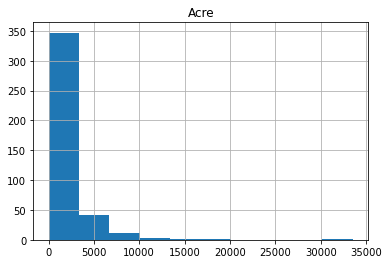

In [224]:
Airport_data.hist()